In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings('ignore')

## About this file
- There are over 400,000 lines of potential question duplicate pairs. Each line contains IDs for each question in the pair, the full text for each question, and a binary value that indicates whether the line truly contains a duplicate pair.
 - yes(1) 
 - no(0)

In [2]:
task = pd.read_csv('questions.csv')

In [3]:
task.shape

(404351, 6)

In [4]:
task.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [5]:
task_new = task[0:100]

Keeping low records

In [6]:
task_new.shape

(100, 6)

In [7]:
task_new.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [8]:
task_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            100 non-null    int64 
 1   qid1          100 non-null    int64 
 2   qid2          100 non-null    int64 
 3   question1     100 non-null    object
 4   question2     100 non-null    object
 5   is_duplicate  100 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 4.8+ KB


- No null values.
- RangeIndex: 100 entries, 0 to 99
- Datatypes can also be observed 

In [9]:
task_new.duplicated().sum()

0

No duplicated rows in the dataset

In [10]:
print(task_new['is_duplicate'].value_counts())
print("\n")
print(task_new['is_duplicate'].value_counts()/task_new['is_duplicate'].value_counts().count()*100)

0    65
1    35
Name: is_duplicate, dtype: int64


0    3250.0
1    1750.0
Name: is_duplicate, dtype: float64


In [11]:
task_new.drop(['id','qid1','qid2'], axis =1, inplace=True)

In [12]:
task_new['question1'] = task_new['question1'].str.lower()
task_new['question2'] = task_new['question2'].str.lower()

In [13]:
stop_word = set(stopwords.words('english'))
task_new["question1"] = task_new["question1"].apply(lambda x: ' '.join(term for term in str(x).split() if term not in stop_word))
task_new["question2"] = task_new["question2"].apply(lambda x: ' '.join(term for term in str(x).split() if term not in stop_word))

In [14]:
task_new['question1'] = task_new['question1'].str.replace('\d+','')
task_new['question2'] = task_new['question2'].str.replace('\d+','')
task_new['question1'] = task_new['question1'].str.replace(r'[!"\$%&\'()*+,\-.\/:;=#@?\[\\\]^_`{|}~]*','')
task_new['question2'] = task_new['question2'].str.replace(r'[!"\$%&\'()*+,\-.\/:;=#@?\[\\\]^_`{|}~]*','')

In [15]:
task_new.head()

,question1,question2,is_duplicate
0,step step guide invest share market india,step step guide invest share market,0
1,story kohinoor kohinoor diamond,would happen indian government stole kohinoor ...,0
2,increase speed internet connection using vpn,internet speed increased hacking dns,0
3,mentally lonely solve it,find remainder mathmath divided,0
4,one dissolve water quikly sugar salt methane c...,fish would survive salt water,0


In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [17]:
questions = list(task_new['question1']) + list(task_new['question2'])

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

Creating a final data frame

In [19]:
new_data1 = pd.DataFrame(q1_arr, index=task_new.index)
new_data2 = pd.DataFrame(q2_arr, index=task_new.index)
new_data = pd.concat([new_data1, new_data2], axis=1)

In [20]:
new_data['is_duplicate'] = task_new['is_duplicate']

In [21]:
new_data.head()

,0,1,2,3,4,5,6,7,8,9,...,640,641,642,643,644,645,646,647,648,is_duplicate
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.247320,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.363578,0.0,0.0,0.0,0.0,0.0,0


<AxesSubplot:xlabel='is_duplicate', ylabel='count'>

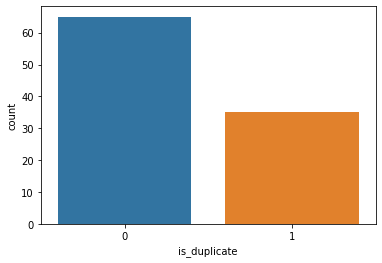

In [22]:
import seaborn as sns
sns.countplot(new_data['is_duplicate'])

In [23]:
a = new_data.iloc[:,0:-1]
a = np.array(a)

In [24]:
b = pd.DataFrame(new_data.iloc[:,-1])

In [25]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
a,b = smote.fit_resample(a,b)

In [26]:
from sklearn.preprocessing import power_transform
a = power_transform(a,method='yeo-johnson')

In [27]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
a = sc.fit_transform(a)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(a,b,test_size=0.2,random_state=42)

In [29]:
model1 = MultinomialNB()
model2 = RandomForestClassifier()

In [30]:
model1.fit(x_train,y_train)
predict = model1.predict(x_test)

In [31]:
print("Final score:- ", accuracy_score(y_test,predict))

Final score:-  0.8846153846153846


In [32]:
print("Classification Report:- \n", classification_report(y_test,predict))

Classification Report:- 
               precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.83      0.91      0.87        11

    accuracy                           0.88        26
   macro avg       0.88      0.89      0.88        26
weighted avg       0.89      0.88      0.89        26



In [33]:
model2.fit(x_train,y_train)
predict1 = model2.predict(x_test)

In [34]:
print("Final score for Random Forest:- ", accuracy_score(y_test,predict1))

Final score for Random Forest:-  0.8461538461538461


In [35]:
print("Classification Report:- \n", classification_report(y_test,predict1))

Classification Report:- 
               precision    recall  f1-score   support

           0       0.79      1.00      0.88        15
           1       1.00      0.64      0.78        11

    accuracy                           0.85        26
   macro avg       0.89      0.82      0.83        26
weighted avg       0.88      0.85      0.84        26



In [36]:
print("confusion matrix:- \n", confusion_matrix(y_test,predict))

confusion matrix:- 
 [[13  2]
 [ 1 10]]


In [37]:
print("confusion matrix:- \n", confusion_matrix(y_test,predict1))

confusion matrix:- 
 [[15  0]
 [ 4  7]]


In [38]:
from sklearn.model_selection import RandomizedSearchCV

In [39]:
criterion = ['gini','entropy']
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
min_samples_split = [5,10,15,20,100]
min_samples_leaf = [2,5,10,15]
ccp_alpha = [0.5,1.5,2.5,3.5,4.5,5.5]
max_features = ['auto','sqrt','log2']

random_grid = {
    'criterion':criterion,
    'max_features':max_features,
    'max_features':max_features,
    'ccp_alpha':ccp_alpha,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
}

In [40]:
rf_random = RandomizedSearchCV(estimator=model2,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,n_jobs=1)

In [41]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ccp_alpha=4.5, criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15; total time=   0.1s
[CV] END ccp_alpha=4.5, criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15; total time=   0.1s
[CV] END ccp_alpha=4.5, criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15; total time=   0.1s
[CV] END ccp_alpha=4.5, criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15; total time=   0.0s
[CV] END ccp_alpha=4.5, criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15; total time=   0.1s
[CV] END ccp_alpha=5.5, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=15, min_samples_split=100; total time=   0.1s
[CV] END ccp_alpha=5.5, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=15, min_samples_split=100; total time=   0.

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'ccp_alpha': [0.5, 1.5, 2.5, 3.5, 4.5,
                                                      5.5],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 5, 10, 15],
                                        'min_samples_split': [5, 10, 15, 20,
                                                              100]},
                   scoring='neg_mean_squared_error', verbose=2)

In [42]:
rf_random.best_estimator_

RandomForestClassifier(ccp_alpha=4.5, max_depth=30, min_samples_leaf=5,
                       min_samples_split=15)

In [56]:
model3 = RandomForestClassifier(ccp_alpha=4.5, max_depth=30, min_samples_leaf=5,
                       min_samples_split=15)

In [57]:
model3.fit(x_train,y_train)
predict2 = model3.predict(x_test)

In [58]:
print("Final score for Random Forest:- ", accuracy_score(y_test,predict2))

Final score for Random Forest:-  0.3939393939393939


In [46]:
x = new_data.iloc[:,0:-1]
x = np.array(x)

In [47]:
y = pd.DataFrame(new_data.iloc[:,-1])

In [48]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x,y = smote.fit_resample(x,y)

In [49]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [52]:
model2 = RandomForestClassifier()

In [53]:
model2.fit(x_train,y_train)

RandomForestClassifier()

In [54]:
predict1 = model2.predict(x_test)

In [55]:
print("Final score:- ", accuracy_score(y_test,predict1))

Final score:-  0.8181818181818182
